In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Import the dataset

In [ ]:
covid=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/population_structure_by_age_per_contry.csv')

cw=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/worldometer_snapshots_April18_to_May18.csv')

Identification of data types:

In [ ]:
covid.dtypes

Country                      object
Fraction age 0-14 years     float64
Fraction age 15-64 years    float64
Fraction age 65+ years      float64
dtype: object

In [ ]:
cw.dtypes

Date                    object
Country                 object
Population               int64
Total Tests            float64
Total Cases            float64
Total Deaths           float64
Total Recovered        float64
Serious or Critical    float64
Active Cases           float64
dtype: object

Size of the dataset:

In [ ]:
covid.shape

(213, 4)

In [ ]:
cw.shape

(6603, 9)

Statistical Summary of Numeric Variables:

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   213 non-null    object 
 1   Fraction age 0-14 years   176 non-null    float64
 2   Fraction age 15-64 years  176 non-null    float64
 3   Fraction age 65+ years    176 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.8+ KB


In [ ]:
cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 6603 non-null   object 
 1   Country              6603 non-null   object 
 2   Population           6603 non-null   int64  
 3   Total Tests          5505 non-null   float64
 4   Total Cases          6554 non-null   float64
 5   Total Deaths         5367 non-null   float64
 6   Total Recovered      6318 non-null   float64
 7   Serious or Critical  4117 non-null   float64
 8   Active Cases         6544 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 464.4+ KB


In [ ]:
covid.describe

<bound method NDFrame.describe of                    Country  ...  Fraction age 65+ years
0                      USA  ...                   0.154
1                   Russia  ...                   0.142
2                    Spain  ...                   0.194
3                   Brazil  ...                   0.086
4                       UK  ...                   0.185
..                     ...  ...                     ...
208              St. Barth  ...                     NaN
209         Western Sahara  ...                     NaN
210               Anguilla  ...                     NaN
211                Lesotho  ...                   0.045
212  Saint Pierre Miquelon  ...                     NaN

[213 rows x 4 columns]>

In [ ]:
cw.describe

<bound method NDFrame.describe of             Date                Country  ...  Serious or Critical  Active Cases
0     2020-04-18                    USA  ...              13551.0      631509.0
1     2020-04-18                 Russia  ...                  8.0       33423.0
2     2020-04-18                  Spain  ...               7371.0       99576.0
3     2020-04-18                 Brazil  ...               6634.0       20335.0
4     2020-04-18                     UK  ...               1559.0       98409.0
...          ...                    ...  ...                  ...           ...
6598  2020-05-18              St. Barth  ...                  NaN           0.0
6599  2020-05-18         Western Sahara  ...                  NaN           0.0
6600  2020-05-18               Anguilla  ...                  NaN           0.0
6601  2020-05-18                Lesotho  ...                  NaN           1.0
6602  2020-05-18  Saint Pierre Miquelon  ...                  NaN           0.0

[6603

In [ ]:
covid.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [ ]:
cw.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


Non-Graphical Univariate Analysis:

In [ ]:
#Number of countries affected

print("Number of counties affected: ",len(cw["Country"].unique()))

Number of counties affected:  213


In [ ]:
#Converting "Date" into Datetime format
cw["Date"]=pd.to_datetime(cw["Date"])

datewise=cw.groupby(["Date"]).agg({"Total Cases":'sum',"Total Deaths":'sum',"Total Recovered":'sum'})

#Total Cases in the World
print("Total Cases in the World: ",datewise["Total Cases"].iloc[-1])

Total Cases in the World:  4887403.0


In [ ]:
#Number of cases Recovered in the world
print("Number of cases Recovered in the world: ",datewise["Total Recovered"].iloc[-1])

Number of cases Recovered in the world:  1904016.0


In [ ]:
#Number of Death cases in the world
print("Number of Death cases in the world: ",datewise["Total Deaths"].iloc[-1])

Number of Death cases in the world:  319950.0


In [ ]:
#Number of Active cases in the world
print("#Number of Active cases in the world: ",(datewise["Total Cases"].iloc[-1]-datewise["Total Recovered"].iloc[-1]-datewise["Total Deaths"].iloc[-1]))

#Number of Active cases in the world:  2663437.0


In [ ]:
#Per Day confirmed Cases in the world
print("Number of Active cases per day in the world: ",np.round(datewise["Total Cases"].iloc[-1]/datewise.shape[0]))

Number of Active cases per day in the world:  157658.0


In [ ]:
#Per Day Recovered Cases in the world
print("Number of Recovered cases per day in the world: ",np.round(datewise["Total Recovered"].iloc[-1]/datewise.shape[0]))

Number of Recovered cases per day in the world:  61420.0


In [ ]:
#Per Day Death Count in the world
print("Number of Death per day in the world: ",np.round(datewise["Total Deaths"].iloc[-1]/datewise.shape[0]))

Number of Death per day in the world:  10321.0


In [ ]:
#Number of patients in the age range 0-14 

print("Number of counties affected with age range: ",len(covid["Fraction age 0-14 years"].unique()))

Number of counties affected with age range:  137


In [ ]:
#Number of patients in the age range 15-64 years

print("Number of patients in the age range 15-64 years: ",len(covid["Fraction age 15-64 years"].unique()))

Number of patients in the age range 15-64 years:  119


In [ ]:
#Number of patients in the age range 65+

print("Number of patients in the age range 65+: ",len(covid["Fraction age 65+ years"].unique()))

Number of patients in the age range 65+:  110


In [ ]:
#Finding null/missing values

covid.isnull().sum(axis = 0)

Country                      0
Fraction age 0-14 years     37
Fraction age 15-64 years    37
Fraction age 65+ years      37
dtype: int64

In [ ]:
cw.isnull().sum(axis = 0)

Date                      0
Country                   0
Population                0
Total Tests            1098
Total Cases              49
Total Deaths           1236
Total Recovered         285
Serious or Critical    2486
Active Cases             59
dtype: int64

In [ ]:
#Removing the missing or the null values from the dataset

covid['Fraction age 0-14 years'].fillna(value=27,inplace=True)
covid['Fraction age 15-64 years'].fillna(value=27,inplace=True)
covid['Fraction age 65+ years'].fillna(value=27,inplace=True)
cw['Total Tests'].fillna(value=27,inplace=True)
cw['Total Cases'].fillna(value=27,inplace=True)
cw['Total Recovered'].fillna(value=27,inplace=True)
cw['Total Deaths'].fillna(value=27,inplace=True)
cw['Serious or Critical'].fillna(value=27,inplace=True)
cw['Active Cases'].fillna(value=27,inplace=True)

In [ ]:
#Check if the null values are removed

covid.isnull().sum(axis = 0)

Country                     0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

In [ ]:
cw.isnull().sum(axis = 0)

Date                   0
Country                0
Population             0
Total Tests            0
Total Cases            0
Total Deaths           0
Total Recovered        0
Serious or Critical    0
Active Cases           0
dtype: int64

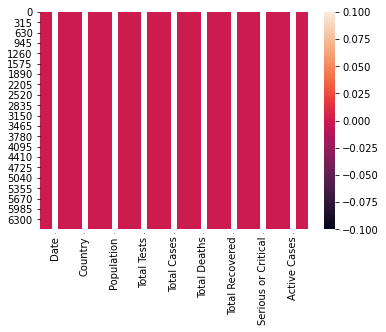

In [ ]:
#checking for the presence of values using heatmap

sns.heatmap(cw.isnull(), annot= True)
plt.show()

Graphical Univariate Analysis:

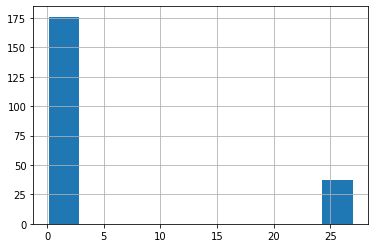

In [ ]:
#Histogram Plot to display of patients in the category Fraction age 0-14 years

covid['Fraction age 0-14 years'].hist(bins=10)

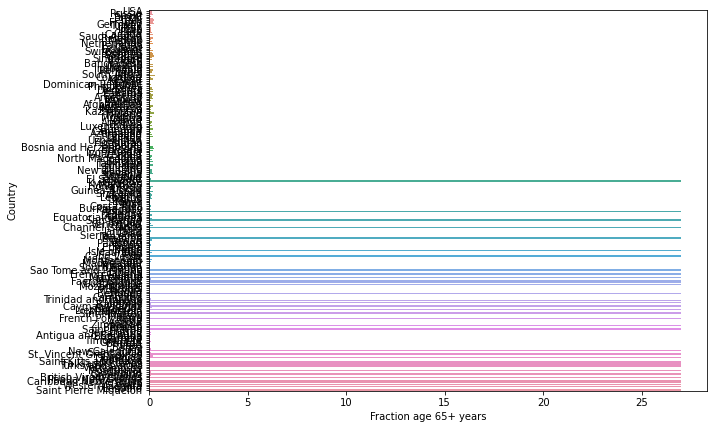

In [ ]:
#Bar Plot to display of patients in the category Fraction age 65+ years
plt.figure(figsize=(10,7))
sns.barplot(y=covid['Country'],x=covid['Fraction age 65+ years'])

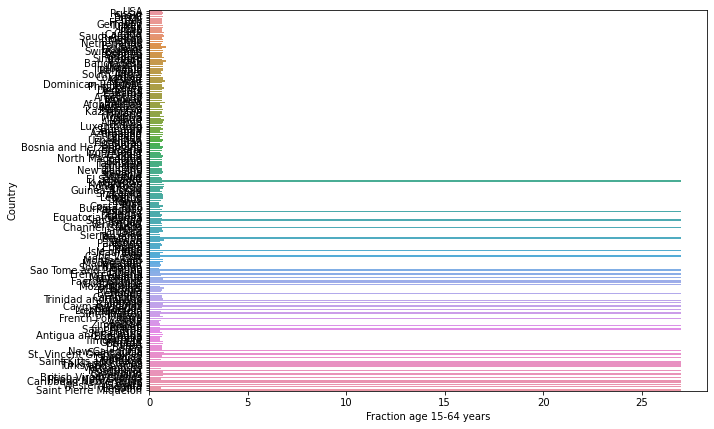

In [ ]:
#Bar Plot to display of patients in the category Fraction age 15-64 years
plt.figure(figsize=(10,7))
sns.barplot(y=covid['Country'],x=covid['Fraction age 15-64 years'])

In [ ]:
import plotly.express as px
fig=px.bar(x=covid.Country,y=covid["Fraction age 0-14 years"])
fig.update_layout(title="Distribution of Number of cases of age group 0-14 years Country-Wise",
                  xaxis_title="Country",yaxis_title="Number of Cases of age group 0-14 years")
fig.show()

In [ ]:
fig=px.bar(x=covid.Country,y=covid["Fraction age 15-64 years"])
fig.update_layout(title="Distribution of Number of cases of age group 15-64 years Country-Wise",
                  xaxis_title="Country",yaxis_title="Number of Cases of 15-64 years")
fig.show()

In [ ]:
fig=px.bar(x=covid.Country,y=covid["Fraction age 65+ years"])
fig.update_layout(title="Distribution of Number of cases of age group 75+ Country-Wise",
                  xaxis_title="Country",yaxis_title="Number of Cases of age group 65+")
fig.show()

In [ ]:
import plotly.express as px
fig=px.bar(x=covid.Country,y=covid["Fraction age 0-14 years"]+covid["Fraction age 15-64 years"]+covid["Fraction age 65+ years"])
fig.update_layout(title="Distribution of Number of cases of all age-groups Country-Wise",
                  xaxis_title="Country",yaxis_title="Number of Cases of all Age-Groups")
fig.show()

In [ ]:
import plotly.express as px
fig=px.bar(x=datewise.index,y=datewise["Total Cases"]-datewise["Total Recovered"]-datewise["Total Deaths"])
fig.update_layout(title="Distribution of Number of Active Cases in the world",
                  xaxis_title="Date",yaxis_title="Number of Cases",)
fig.show()

In [ ]:
fig=px.bar(x=datewise.index,y=datewise["Total Recovered"]+datewise["Total Deaths"])
fig.update_layout(title="Distribution of Number of Closed Cases in the World",
                  xaxis_title="Date",yaxis_title="Number of Cases")
fig.show()

In [ ]:
#Calculating the Recovery Rate

datewise["Recovery Rate"]=(datewise["Total Recovered"]/datewise["Total Cases"])*100
datewise["Active Cases"]=datewise["Total Cases"]-datewise["Total Recovered"]-datewise["Total Deaths"]
datewise["Closed Cases"]=datewise["Total Recovered"]+datewise["Total Deaths"]

print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Recovery Rate 32.46333515242366
Median Recovery Rate 32.76548022676422


In [ ]:
#checking for correaltion between variables

covid.corr()

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Fraction age 0-14 years,1.000000,0.999888,0.999896
Fraction age 15-64 years,0.999888,1.000000,0.999979
Fraction age 65+ years,0.999896,0.999979,1.000000


In [ ]:
cw.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
Population,1.000000,0.216559,0.226143,0.184753,0.310771,0.172327,0.179594
Total Tests,0.216559,1.000000,0.898474,0.812314,0.795363,0.745159,0.855272
Total Cases,0.226143,0.898474,1.000000,0.935240,0.818972,0.892123,0.975016
Total Deaths,0.184753,0.812314,0.935240,1.000000,0.795855,0.833068,0.881891
Total Recovered,0.310771,0.795363,0.818972,0.795855,1.000000,0.722733,0.685134
Serious or Critical,0.172327,0.745159,0.892123,0.833068,0.722733,1.000000,0.875936
Active Cases,0.179594,0.855272,0.975016,0.881891,0.685134,0.875936,1.000000


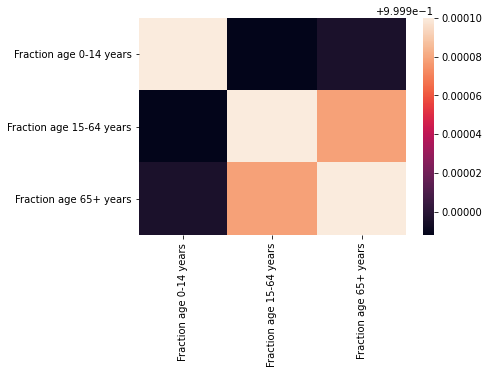

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(covid.corr())

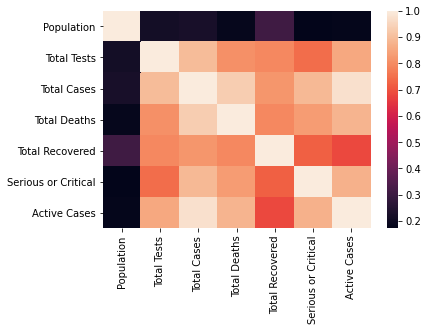

In [ ]:
sns.heatmap(cw.corr())

In [ ]:
#Checking the skewness

covid.skew()

Fraction age 0-14 years     1.734370
Fraction age 15-64 years    1.734589
Fraction age 65+ years      1.734611
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
covid['Fraction age 0-14 years'] = le.fit_transform(covid['Fraction age 0-14 years'])
covid['Fraction age 15-64 years'] = le.fit_transform(covid['Fraction age 15-64 years'])
covid['Fraction age 65+ years'] = le.fit_transform(covid['Fraction age 65+ years'])

covid.head(5)

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,35,68,81
1,Russia,29,87,72
2,Spain,11,70,98
3,Brazil,49,97,54
4,UK,30,53,92


In [ ]:
#dummifying data required for spliting the data

covid = pd.get_dummies(covid)
covid.head(5)

,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Anguilla,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,Country_Bolivia,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brazil,Country_British Virgin Islands,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_CAR,Country_Cabo Verde,Country_Cambodia,Country_Cameroon,Country_Canada,...,Country_Singapore,Country_Sint Maarten,Country_Slovakia,Country_Slovenia,Country_Somalia,Country_South Africa,Country_South Sudan,Country_Spain,Country_Sri Lanka,Country_St. Barth,Country_St. Vincent Grenadines,Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turks and Caicos,Country_UAE,Country_UK,Country_USA,Country_Uganda,Country_Ukraine,Country_Uruguay,Country_Uzbekistan,Country_Vatican City,Country_Venezuela,Country_Vietnam,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,35,68,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,29,87,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,11,70,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,49,97,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30,53,92,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = covid['Fraction age 0-14 years']
X = covid

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 0.282900 (0.024034)
Decision Tree with Gini Coefficient: 0.269048 (0.029720)
K Nearest Neighbors: 0.203896 (0.036537)
Naive Bayes: 0.240909 (0.030948)
Random Forrest: 0.232251 (0.036354)
Random Forrest with Gini Coefficient: 0.227056 (0.032830)
Bagging Classifier: 0.245455 (0.029276)
Ada Boost Classifier: 0.117965 (0.018742)
Gradient Boosting Classifier: 0.180736 (0.043505)
XGB Classifier: 0.227056 (0.034190)
XGBRF Classifier: 0.194589 (0.039812)


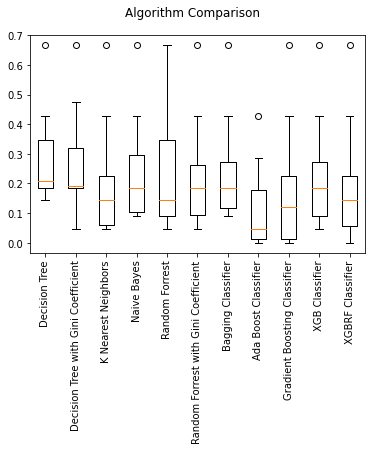

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Saving the model as a pickle in a file

from sklearn.externals import joblib

joblib.dump(rfc,'Country-wideCovid-19.pkl')

['Country-wideCovid-19.pkl']